# 01 Model Nasıl Çalışır

## [Giriş](https://www.kaggle.com/code/dansbecker/how-models-work#Introduction)

Makine öğrenimi modellerinin nasıl çalıştığına ve nasıl kullanıldığına dair bir genel bakışla başlayacağız. Daha önce istatistiksel modelleme veya makine öğrenimi yaptıysanız, bu temel gelebilir. Endişelenmeyin, yakında güçlü modeller oluşturmaya devam edeceğiz.

Bu kurs, aşağıdaki senaryodan geçerken modeller oluşturmanızı sağlayacaktır:

Kuzenin gayrimenkul üzerine spekülasyon yaparak milyonlarca dolar kazandı. Veri bilimine olan ilginiz nedeniyle sizinle iş ortağı olmayı teklif etti. Parayı o sağlayacak ve çeşitli evlerin ne kadar değerli olduğunu tahmin eden modeller tedarik edeceksiniz.

Kuzeninize geçmişte gayrimenkul değerlerini nasıl tahmin ettiğini soruyorsunuz ve bunun sadece sezgi olduğunu söylüyor. Ancak daha fazla sorgulama, geçmişte gördüğü evlerden fiyat kalıplarını belirlediğini ve bu kalıpları düşündüğü yeni evler için tahminlerde bulunmak için kullandığını ortaya koyuyor.

Makine öğrenimi de aynı şekilde çalışır. Karar Ağacı adlı bir modelle başlayacağız. Daha doğru tahminler veren daha meraklı modeller var. Ancak karar ağaçlarının anlaşılması kolaydır ve veri bilimindeki en iyi modellerden bazıları için temel yapı taşıdırlar.

Basitlik için, mümkün olan en basit karar ağacıyla başlayacağız.

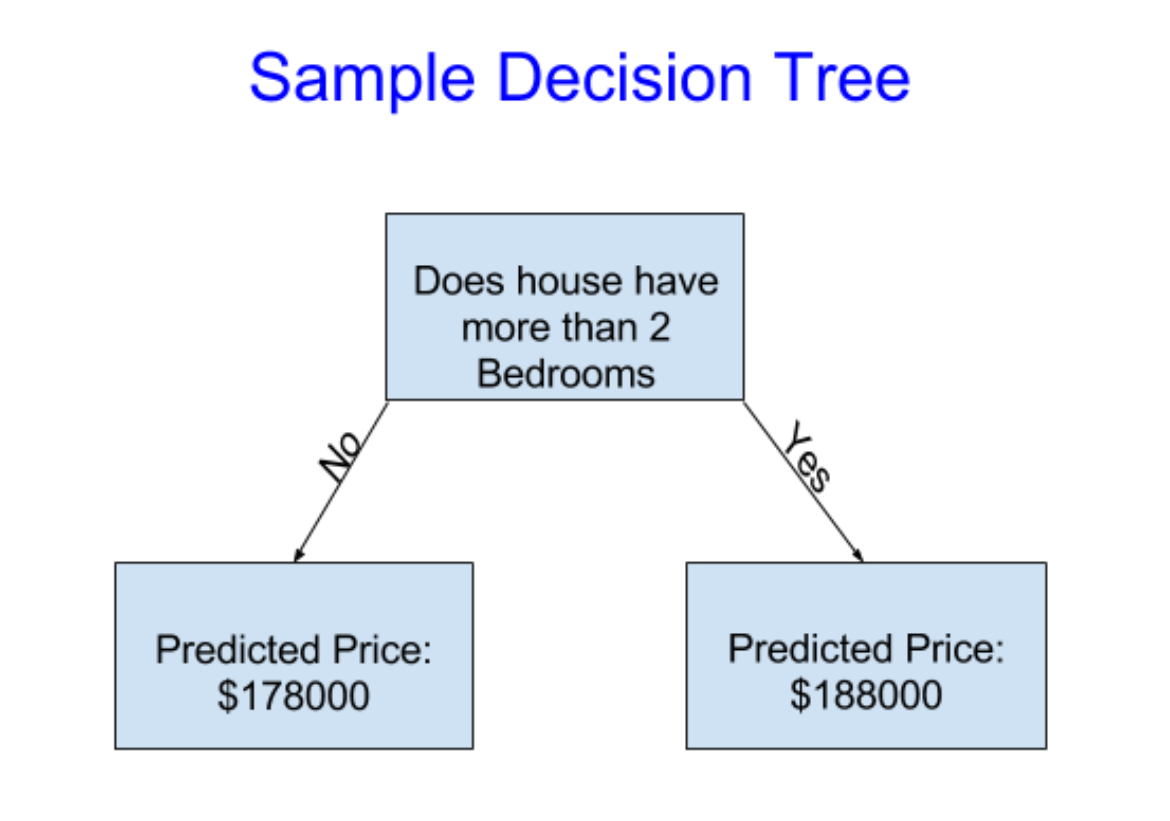

Evleri sadece iki kategoriye ayırır. Söz konusu herhangi bir ev için öngörülen fiyat, aynı kategorideki evlerin tarihsel ortalama fiyatıdır.

Evleri iki gruba nasıl ayıracağımıza karar vermek ve ardından her grupta tahmin edilen fiyatı belirlemek için verileri kullanıyoruz. Verilerden kalıpları yakalamanın bu adımına **uydurma** veya **eğitme** denir. Modele **sığdırmak** için kullanılan verilere **eğitim verileri** denir.

Modelin nasıl sığdığının ayrıntıları (örneğin, verilerin nasıl bölüneceği) daha sonrası için kaydedeceğimiz kadar karmaşıktır. Model takıldıktan sonra, ek evlerin fiyatlarını **tahmin etmek** için yeni verilere uygulayabilirsiniz.

---

## [Karar Ağacını İyileştirmek](https://www.kaggle.com/code/dansbecker/how-models-work#Improving-the-Decision-Tree)

Aşağıdaki iki karar ağacından hangisinin gayrimenkul eğitim verilerinin sığdırılmasından kaynaklanması daha olasıdır?

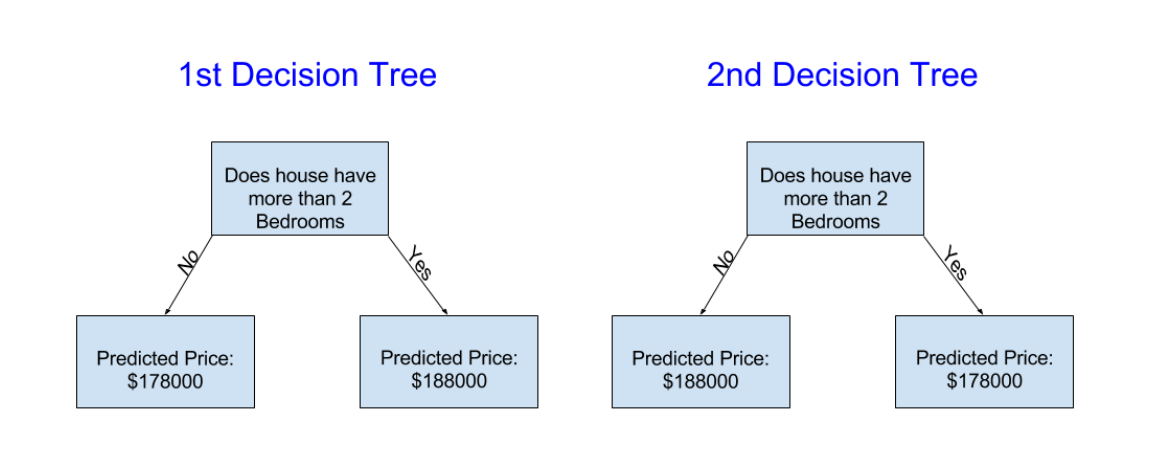

Soldaki karar ağacı (Karar Ağacı 1) muhtemelen daha mantıklı, çünkü daha fazla yatak odası olan evlerin daha az yatak odalı evlerden daha yüksek fiyatlarla satma eğiliminde olduğu gerçeğini yakalıyor. Bu modelin en büyük eksikliği, banyo sayısı, arsa büyüklüğü, konum vb. gibi ev fiyatını etkileyen çoğu faktörü yakalamamasıdır.

Daha fazla "bölünme" olan bir ağaç kullanarak daha fazla faktörü yakalayabilirsiniz. Bunlara "daha derin" ağaçlar denir. Her evin arsasının toplam büyüklüğünü de dikkate alan bir karar ağacı şöyle görünebilir:

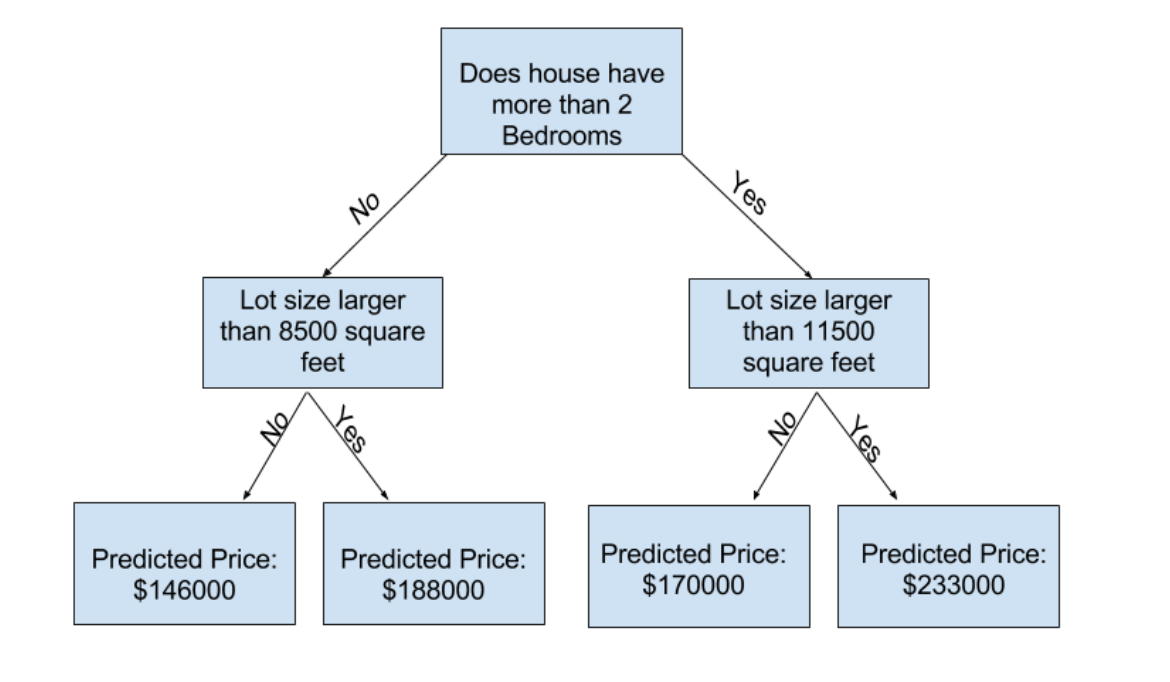

Karar ağacını takip ederek, her zaman o evin özelliklerine karşılık gelen yolu seçerek herhangi bir evin fiyatını tahmin edersiniz. Ev için öngörülen fiyat ağacın dibinde. Altta tahmin yaptığımız noktaya **yaprak** denir. 

Yapraklardaki bölünmeler ve değerler veriler tarafından belirlenecektir, bu nedenle birlikte çalışacağınız verileri kontrol etmenin zamanı geldi.

---

# 02 Basit Veri Keşfi

## [Verilerinizi Tanımak için Pandas Kullanma](https://www.kaggle.com/code/dansbecker/basic-data-exploration#Using-Pandas-to-Get-Familiar-With-Your-Data)

Herhangi bir makine öğrenimi projesindeki ilk adım, verilere aşina olmaktır. Bunun için Pandalar kütüphanesini kullanacaksınız. Pandalar, bilim adamlarının verileri keşfetmek ve manipüle etmek için kullandıkları birincil araçtır. Çoğu insan pandaları kodlarında `pd` olarak kısaltır. Bunu komutla yapıyoruz

In [1]:
import pandas as pd

Pandas kütüphanesinin en önemli kısmı DataFrame'dir. Bir DataFrame, tablo olarak düşünebileceğiniz veri türünü tutar. Bu, Excel'deki bir sayfaya veya SQL veritabanındaki bir tabloya benzer.

Pandas, bu tür verilerle yapmak isteyeceğiniz çoğu şey için güçlü yöntemlere sahiptir.

Örnek olarak, Melbourne, Australia [ev fiyatları hakkında verilere](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) bakacağız. Uygulamalı alıştırmalarda, aynı süreçleri Iowa'da ev fiyatları olan yeni bir veri kümesine uygulayacaksınız.

Örnek (Melbourne) verileri **`melb_data.csv`** dosya yolundadır.

Verileri aşağıdaki komutlarla yüklüyor ve keşfediyoruz:

In [2]:
# save filepath to variable for easier access
melbourne_file_path = 'melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## [Veri Tanımını Yorumlama](https://www.kaggle.com/code/dansbecker/basic-data-exploration#Interpreting-Data-Description)

Sonuçlar, orijinal veri kümenizdeki her sütun için 8 sayı gösterir. İlk sayı, **count**, kaç satırın eksik olmayan değerlere sahip olduğunu gösterir.

Eksik değerler birçok nedenden dolayı ortaya çıkar. Örneğin, 1 yatak odalı bir evi araştırırken 2. yatak odasının büyüklüğü toplanmaz. Eksik veri konusuna geri döneceğiz.

İkinci değer, ortalama olan **mean**'dir. Bunun altında, **std**, değerlerin ne kadar sayısal olarak yayıldığını ölçen standart sapmadır.

**Min**, **25%**, **50%**, **75%** ve **Max** değerlerini yorumlamak için, her sütunu en düşük değerden en yüksek değere sıraladığınızı hayal edin. İlk (en küçük) değer min. Listede çeyrek yola giderseniz, değerlerin %25'inden büyük ve değerlerin %75'inden daha küçük bir sayı bulacaksınız. Bu **%25** değerdir ("25. yüzdelik dilim" olarak telaffuz edilir). 50. ve 75. yüzdelik dilimler benzer şekilde tanımlanır ve **Max** en büyük sayıdır.

---

# 03 İlk Makine Öğrenimi Modeli

## [Modelleme için Veri Seçme](https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model#Selecting-Data-for-Modeling)

Veri kümeniz, kafanızı sarmak ve hatta güzelce yazdırmak için çok fazla değişkene sahipti. Bu ezici miktardaki veriyi anlayabileceğiniz bir şeye nasıl indirebilirsiniz?

Sezgimizi kullanarak birkaç değişken seçerek başlayacağız. Sonraki dersler size değişkenleri otomatik olarak önceliklendirmek için istatistiksel teknikler gösterecektir.

Değişkenleri/sütunları seçmek için, veri kümesindeki tüm sütunların bir listesini görmemiz gerekir. Bu, DataFrame'in **sütunlar** özelliği ile yapılır (aşağıdaki kodun alt satırı).

In [3]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [4]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

Verilerinizin bir alt kümesini seçmenin birçok yolu vardır. [Pandas kursu](https://www.kaggle.com/learn/pandas) bunları daha derinlemesine ele alıyor, ancak şimdilik iki yaklaşıma odaklanacağız.

1. "Tahmin hedefini" seçmek için kullandığımız nokta notasyonu

2. "Özellikleri" seçmek için kullandığımız bir sütun listesiyle seçmek

## [Tahmin Hedefini Seçme](https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model#Selecting-The-Prediction-Target)

**Nokta notu** ile bir değişken çekebilirsiniz. Bu tek sütun, genel olarak yalnızca tek bir veri sütununa sahip bir DataFrame gibi olan bir **Seri**'de saklanır.

**Tahmin hedefi** olarak adlandırılan tahmin etmek istediğimiz sütunu seçmek için nokta notasyonunu kullanacağız. Geleneksel olarak, tahmin hedefine **y** denir. Yani Melbourne verilerinde ev fiyatlarını kaydetmek için ihtiyacımız olan kod

In [5]:
y = melbourne_data.Price

# ["Özellikler"i Seçmek](https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model#Choosing-%22Features%22)

Modelimize girilen (ve daha sonra tahminlerde bulunmak için kullanılan) sütunlara "özellikler" denir. Bizim durumumuzda, bunlar ev fiyatını belirlemek için kullanılan sütunlar olacaktır. Bazen, hedef dışındaki tüm sütunları özellik olarak kullanacaksınız. Diğer zamanlarda daha az özellik ile daha iyi olacaksınız.

Şimdilik, sadece birkaç özelliğe sahip bir model oluşturacağız. Daha sonra farklı özelliklerle oluşturulmuş modelleri nasıl yineleyeceğinizi ve karşılaştıracağınızı göreceksiniz.

Köşeli ayraçların içinde sütun adlarının bir listesini sağlayarak birden fazla özellik seçiyoruz. Bu listedeki her öğe bir dize olmalıdır (tırnak işaretleri ile).

İşte bir örnek:

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

Geleneksel olarak, bu verilere **X** denir.

In [7]:
X = melbourne_data[melbourne_features]

En üstteki birkaç satırı gösteren `describe`yöntemini ve `head` yöntemini kullanarak ev fiyatlarını tahmin etmek için kullanacağımız verileri hızlıca gözden geçirelim.

In [8]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [9]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


Verilerinizi bu komutlarla görsel olarak kontrol etmek, bir veri bilimcisinin işinin önemli bir parçasıdır. Veri kümesinde sık sık daha fazla incelemeyi hak eden sürprizler bulacaksınız.

---

# [Building Your Model](https://www.kaggle.com/code/dansbecker/your-first-machine-learning-model#Building-Your-Model)

Modellerinizi oluşturmak için **scikit-learn** kitaplığını kullanacaksınız. Kodlama yaparken, bu kitaplık örnek kodda göreceğiniz gibi **sklearn** olarak yazılır. Scikit-learn, tipik olarak DataFrames'te depolanan veri türlerini modellemek için kolayca en popüler kütüphanedir.

Bir model oluşturma ve kullanma adımları şunlardır:

- **Tanımla:** Ne tür bir model olacak? Bir karar ağacı mı? Başka bir model türü? Model tipinin diğer bazı parametreleri de belirtilmiştir.

- **Uydur:** Sağlanan verilerden kalıpları yakalayın. Bu, modellemenin kalbidir.

- **Tahmin et:** Tam olarak kulağa nasıl geliyor

- **Değerlendir**: Modelin tahminlerinin ne kadar doğru olduğunu belirleyin.

İşte scikit-learn ile bir karar ağacı modelini tanımlamanın ve onu özellikler ve hedef değişkeni ile uydurmanın bir örneği.

In [10]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

Birçok makine öğrenimi modeli, model eğitiminde bir miktar rastgeleliğe izin verir. `random_state` için bir sayı belirtmek, her çalıştırmada aynı sonuçları almanızı sağlar. Bu iyi bir uygulama olarak kabul edilir. Herhangi bir sayı kullanırsınız ve model kalitesi, tam olarak hangi değeri seçtiğinize anlamlı bir şekilde bağlı olmayacaktır.

Artık tahminlerde bulunmak için kullanabileceğimiz uygun bir modelimiz var.

Uygulamada, zaten fiyatlarımız olan evler yerine piyasaya çıkan yeni evler için tahminlerde bulunmak isteyeceksiniz. Ancak tahmin işlevinin nasıl çalıştığını görmek için eğitim verilerinin ilk birkaç satırı için tahminler yapacağız.

In [11]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


---

# 04 Model Doğrulama

Bir model yaptınız. Ama ne kadar iyi?

Bu derste, modelinizin kalitesini ölçmek için model doğrulamasını kullanmayı öğreneceksiniz. Model kalitesini ölçmek, modellerinizi yinelemeli olarak geliştirmenin anahtarıdır.

## [Model Doğrulama Nedir](https://www.kaggle.com/code/dansbecker/model-validation#What-is-Model-Validation)

Oluşturduğunuz hemen hemen her modeli değerlendirmek isteyeceksiniz. Çoğu (hepsi olmasa da) uygulamada, model kalitesinin ilgili ölçüsü tahmin doğruluğudur. Başka bir deyişle, modelin tahminleri gerçekte olana yakın olacak mı?

Birçok insan tahmine dayalı doğruluğu ölçerken büyük bir hata yapar. _Eğitim verileri_ ile tahminler yaparlar ve bu tahminleri _eğitim verileri_ içindeki hedef değerlerle karşılaştırırlar. Bu yaklaşımla ilgili sorunu ve nasıl çözüleceğini birazdan göreceksiniz, ancak önce bunu nasıl yapacağımızı düşünelim.

Önce model kalitesini anlaşılır bir şekilde özetlemeniz gerekir. 10.000 ev için tahmin edilen ve gerçek ev değerlerini karşılaştırırsanız, muhtemelen iyi ve kötü tahminlerin karışımını bulacaksınız. Tahmin edilen 10.000 ve gerçek değerden oluşan bir listeye bakmak anlamsız olurdu. Bunu tek bir ölçümde özetlememiz gerekiyor.

Model kalitesini özetlemek için birçok metrik vardır, ancak **Mean Absolute Error** (**MAE** olarak da adlandırılır) adlı bir metrikle başlayacağız. Son kelime ile başlayan bu metriği parçalayalım, hata.

Her ev için tahmin hatası:   

```
Hata=gerçek-öngörülen
```

Yani, bir ev 150.000 dolara mal olursa ve bunun 100.000 dolara mal olacağını tahmin ettiyseniz, hata 50.000 dolardır.

MAE metriği ile her hatanın mutlak değerini alıyoruz. Bu, her hatayı pozitif bir sayıya dönüştürür. Daha sonra bu mutlak hataların ortalamasını alıyoruz. Bu bizim model kalitesi ölçümüzdür. Sade İngilizce'de, şöyle söylenebilir:

> Ortalama olarak, tahminlerimiz yaklaşık X civarındadır.

MAE'yi hesaplamak için önce bir modele ihtiyacımız var. Bu, aşağıdaki gizli bir hücrede oluşturulmuştur ve `kod` düğmesine tıklayarak inceleyebilirsiniz.

In [12]:
# Filter rows with missing price values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
                        'YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]

from sklearn.tree import DecisionTreeRegressor
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor()

Bir modelimiz olduğunda, ortalama mutlak hatayı şu şekilde hesaplarız:

In [13]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

434.71594577146544

## ["Örnek İçi" Puanlarla İlgili Sorun](https://www.kaggle.com/code/dansbecker/model-validation#The-Problem-with-%22In-Sample%22-Scores)

Az önce hesapladığımız ölçü "örnek içi" puan olarak adlandırılabilir. Hem modeli inşa etmek hem de değerlendirmek için tek bir "örnek" ev kullandık. İşte bu yüzden kötü.

Büyük emlak piyasasında kapı renginin ev fiyatıyla ilgisi olmadığını hayal edin.

Ancak, modeli oluşturmak için kullandığınız veri örneğinde, yeşil kapılı tüm evler çok pahalıydı. Modelin işi, ev fiyatlarını tahmin eden kalıpları bulmaktır, böylece bu modeli görecek ve her zaman yeşil kapılı evler için yüksek fiyatları tahmin edecektir.

Bu örüntü eğitim verilerinden türetildiği için model eğitim verilerinde doğru görünecektir.

Ancak model yeni veriler gördüğünde bu model geçerli değilse, model pratikte kullanıldığında çok yanlış olacaktır.

Modellerin pratik değeri, yeni veriler üzerinde tahminlerde bulunmaktan geldiğinden, modeli oluşturmak için kullanılmayan veriler üzerindeki performansı ölçüyoruz. Bunu yapmanın en basit yolu, bazı verileri model oluşturma sürecinden çıkarmak ve ardından bunları modelin daha önce görmediği veriler üzerindeki doğruluğunu test etmek için kullanmaktır. Bu veriye **validasyon verisi** denir.

## [Kodlama](https://www.kaggle.com/code/dansbecker/model-validation#Coding-It)

Scikit-learn kitaplığı, verileri iki parçaya bölmek için bir `train_test_split` işlevine sahiptir. Bu verilerin bir kısmını modele uyacak şekilde eğitim verileri olarak kullanacağız ve diğer verileri `mean_absolute_error` hesaplamak için doğrulama verileri olarak kullanacağız.

İşte kod:

In [14]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

259909.10974822467


## [Vay canına]( https://www.kaggle.com/code/dansbecker/model-validation#Wow!)

Örnek içi veriler için ortalama mutlak hatanız yaklaşık 500 dolardı. Out-of-sample 250.000 dolardan fazla.

Bu, neredeyse tam olarak doğru olan bir model ile çoğu pratik amaç için kullanılamayan bir model arasındaki farktır. Referans noktası olarak, validasyon verilerindeki ortalama ev değeri 1,1 milyon dolardır. Yani yeni verilerdeki hata, ortalama ev değerinin yaklaşık dörtte biri.

Daha iyi özellikler veya farklı model türleri bulmak için denemeler yapmak gibi bu modeli geliştirmenin birçok yolu vardır.

---

# Az Uyum ve Aşırı Uyum

Bu adımın sonunda, az uyum ve aşırı uyum kavramlarını anlayacak ve modellerinizi daha doğru hale getirmek için bu fikirleri uygulayabileceksiniz.

## [Farklı Modellerle Denemeler](https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting#Experimenting-With-Different-Models)

Artık model doğruluğunu ölçmek için güvenilir bir yola sahip olduğunuza göre, alternatif modelleri deneyebilir ve hangisinin en iyi tahminleri verdiğini görebilirsiniz. Ama modeller için ne gibi alternatifleriniz var?

Scikit-learn'in [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) karar ağacı modelinin birçok seçeneğe sahip olduğunu (uzun süre isteyeceğinizden veya ihtiyaç duyacağınızdan daha fazla) görebilirsiniz. En önemli seçenekler ağacın derinliğini belirler. [Bu kurstaki ilk dersten](https://www.kaggle.com/dansbecker/how-models-work) bir ağacın derinliğinin bir tahmine gelmeden önce kaç bölme yaptığının bir ölçüsü olduğunu hatırlayın. Bu nispeten sığ bir ağaç

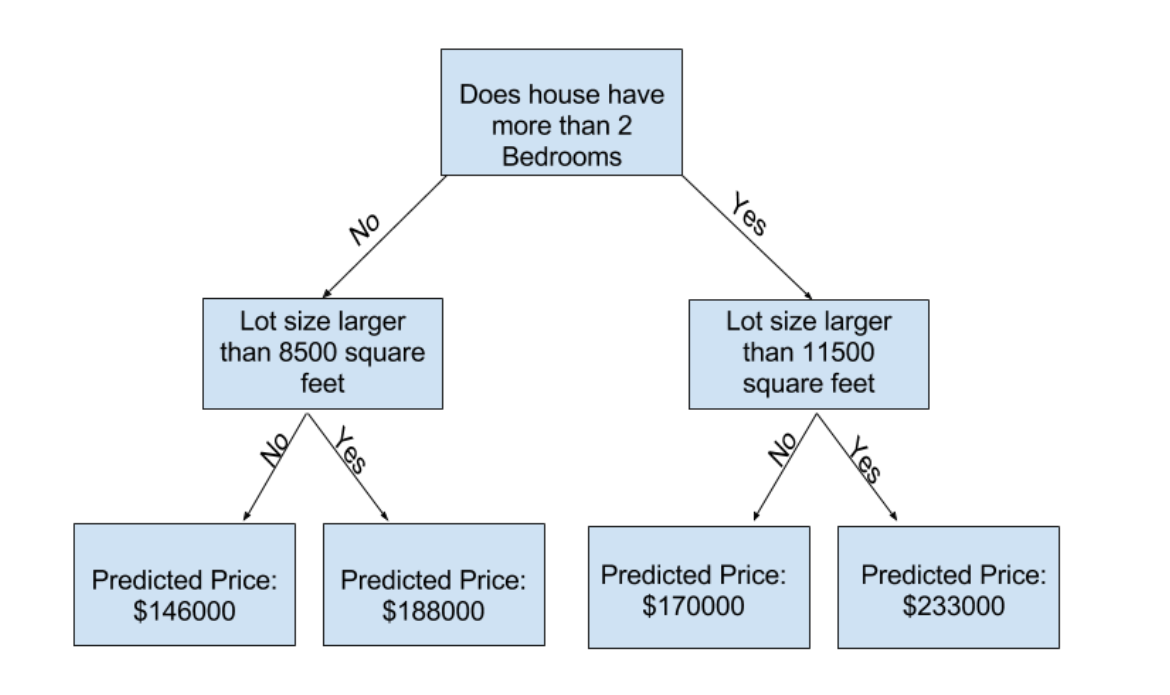

Uygulamada, bir ağacın en üst seviye (tüm evler) ve bir yaprak arasında 10 bölmeye sahip olması nadir değildir. Ağaç derinleştikçe, veri kümesi daha az ev içeren yapraklar halinde dilimlenir. Bir ağaç sadece 1 bölümeye sahipse, verileri 2 gruba ayırır. Her grup tekrar bölünürse, 4 grup ev alırız. Bunların her birini tekrar bölmek 8 grup oluşturacaktır. Her seviyeye daha fazla bölme ekleyerek grup sayısını ikiye katlamaya devam edersek, 10. seviyeye geldiğimizde 210 grup evimiz olacak. Bu 1024 yaprak.

Evleri birçok yaprağa böldüğümüzde, her yaprakta daha az evimiz olur. Çok az eve sahip yapraklar, bu evlerin gerçek değerlerine oldukça yakın tahminler yapacaktır, ancak yeni veriler için çok güvenilmez tahminler yapabilirler (çünkü her tahmin sadece birkaç eve dayanmaktadır).

Bu, bir modelin eğitim verileriyle neredeyse mükemmel bir şekilde eşleştiği, ancak doğrulama ve diğer yeni verilerde kötü performans yaptığı **aşırı uyum** adı verilen bir olgudur. Diğer taraftan, ağacımızı çok sığ yaparsak, evleri çok farklı gruplara ayırmaz.

Aşırı bir noktada, bir ağaç evleri sadece 2 veya 4'e bölerse, her grubun hala çok çeşitli evleri vardır. Ortaya çıkan tahminler, eğitim verilerinde bile çoğu ev için çok uzak olabilir (ve aynı nedenle doğrulamada da kötü olacaktır). Bir model verilerdeki önemli ayrımları ve kalıpları yakalayamadığında, bu nedenle eğitim verilerinde bile düşük performans gösterir, buna **az uygunluk** denir.

Doğrulama verilerimizden tahmin ettiğimiz yeni verilerin doğruluğunu önemsediğimiz için, uyum ve aşırı uyum arasındaki tatlı noktayı bulmak istiyoruz. Görsel olarak, aşağıdaki şekilde (kırmızı) doğrulama eğrisinin düşük noktasını istiyoruz.

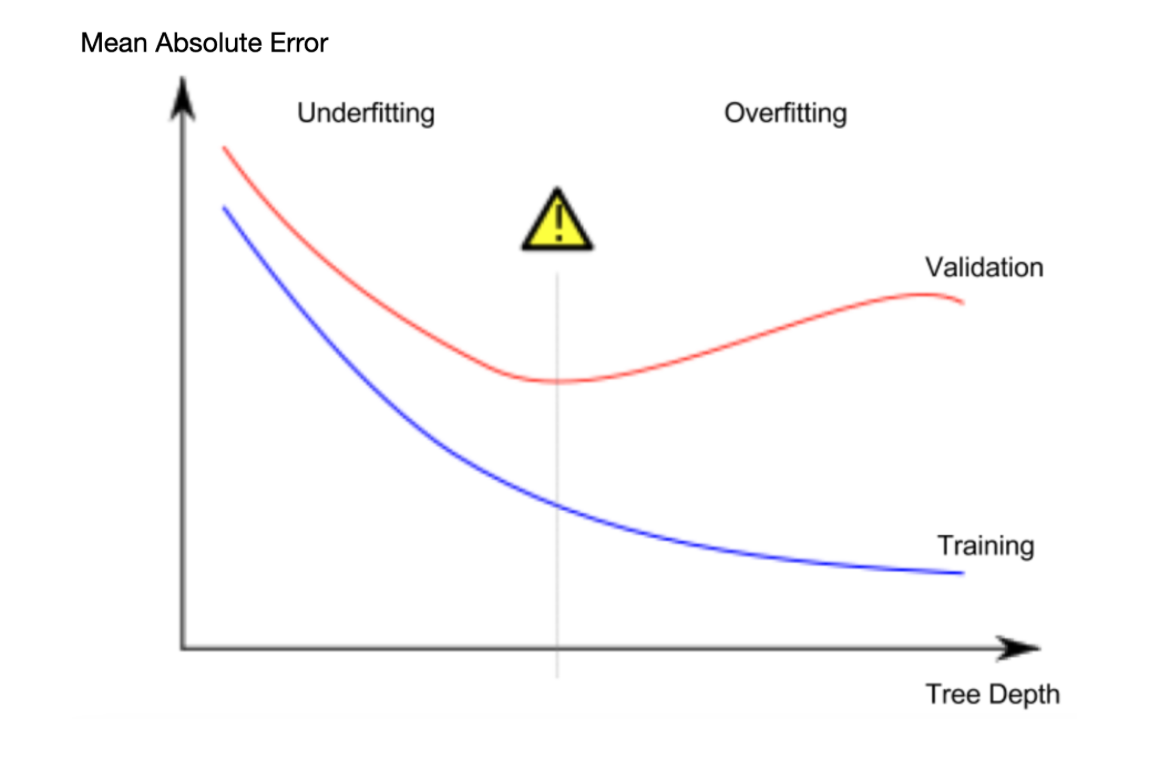

## [Örnek](https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting#Example)

Ağaç derinliğini kontrol etmek için birkaç alternatif vardır ve birçoğu ağaçtan geçen bazı rotaların diğer rotalardan daha fazla derinliğe sahip olmasına izin verir. Ancak _max_leaf_nodes_ bağımsız değişkeni, aşırı oturmayı ve yetersiz uyumu kontrol etmek için çok mantıklı bir yol sağlar. Modelin yapmasına ne kadar çok yaprak izin verirsek, yukarıdaki grafikteki altı alandan aşırı oturma alanına o kadar çok geçeriz.

_Max_leaf_nodes_ için farklı değerlerden MAE puanlarını karşılaştırmaya yardımcı olmak için bir yardımcı program işlevi kullanabiliriz:

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

Veriler, daha önce gördüğünüz (ve daha önce yazdığınız) kod kullanılarak **train_X**, **val_X**, **train_y** ve **val_y**'ye yüklenir.

_Max_leaf_nodes_ için farklı değerlerle oluşturulan modellerin doğruluğunu karşılaştırmak için bir for-loop kullanabiliriz. 

In [16]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  347380
Max leaf nodes: 50  		 Mean Absolute Error:  258171
Max leaf nodes: 500  		 Mean Absolute Error:  243495
Max leaf nodes: 5000  		 Mean Absolute Error:  255015


Listelenen seçeneklerden 500, en uygun yaprak sayısıdır.

---

## [Sonuç](https://www.kaggle.com/code/dansbecker/underfitting-and-overfitting#Conclusion)

İşte bir bilgi: Modeller şunlardan birinden muzdarip olabilir:

- **Aşırı Uyum:** gelecekte tekrarlamayacak, daha az doğru tahminlere yol açan sahte kalıpları yakalamak veya

- **Az Uyum:** ilgili kalıpları yakalayamamak, yine daha az doğru tahminlere yol açar.

Bir aday modelin doğruluğunu ölçmek için model eğitiminde kullanılmayan **doğrulama** verilerini kullanıyoruz. Bu, birçok aday modelini denememizi ve en iyisini tutmamızı sağlar.

---

# 06 Random Forests

## [Giriş](https://www.kaggle.com/code/dansbecker/random-forests#Introduction)

Karar ağaçları sizi zor bir kararla bırakır. Çok yapraklı derin bir ağaç fazla sığacaktır çünkü her tahmin, yalnızca yaprağındaki birkaç evden gelen tarihsel verilerden gelir. Ancak az yapraklı sığ bir ağaç, ham verilerdeki çok fazla ayrımı yakalayamadığı için kötü performans gösterecektir.

Günümüzün en sofistike modelleme teknikleri bile, az uyum ve aşırı uyum arasındaki bu gerilimle karşı karşıyadır. Ancak, birçok modelin daha iyi performansa yol açabilecek akıllı fikirleri vardır. Örnek olarak **rastgele ormana** bakacağız.

Rastgele orman birçok ağaç kullanır ve her bir bileşen ağacının tahminlerinin ortalamasını alarak bir tahmin yapar. Genellikle tek bir karar ağacından çok daha iyi tahmin doğruluğuna sahiptir ve varsayılan parametrelerle iyi çalışır. Modellemeye devam ederseniz, daha da iyi performansa sahip daha fazla model öğrenebilirsiniz, ancak bunların çoğu doğru parametreleri elde etmeye duyarlıdır.

## [Örnek](https://www.kaggle.com/code/dansbecker/random-forests#Örnek)

Verileri yüklemek için kodu birkaç kez gördünüz. Data-loading'in sonunda aşağıdaki değişkenlere sahibiz:

- train_X

- val_X

- train_y

- val_y

Scikit-learn'de bir karar ağacı oluşturma şeklimize benzer şekilde rastgele bir orman modeli oluşturuyoruz - bu sefer `DecisionTreeRegressor` yerine `RandomForestRegressor` sınıfını kullanarak.

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

191656.64906176025


## [Sonuç](https://www.kaggle.com/code/dansbecker/random-forests#Conclusion)

Muhtemelen daha fazla iyileştirme için yer vardır, ancak bu, 250.000'lik en iyi karar ağacı hatasına göre büyük bir gelişmedir. Tek karar ağacının maksimum derinliğini değiştirdiğimiz gibi Rastgele Orman'ın performansını değiştirmenize izin veren parametreler var. Ancak Random Forest modellerinin en iyi özelliklerinden biri, bu ayarlama olmadan bile genellikle makul bir şekilde çalışmalarıdır.

---